In [ ]:
## Warning: This will not work without a complete installation of FEniCS
# see: https://fenicsproject.org/
# this will NOT work in Google Colab, FEniCS needs to run on linux distro or docker

In [ ]:
from fenics import *
from mshr import *
import matplotlib.pyplot as plt
%matplotlib inline 
#% matplotlib notebook
from IPython.display import Image
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png', 'pdf')

from IPython.display import clear_output

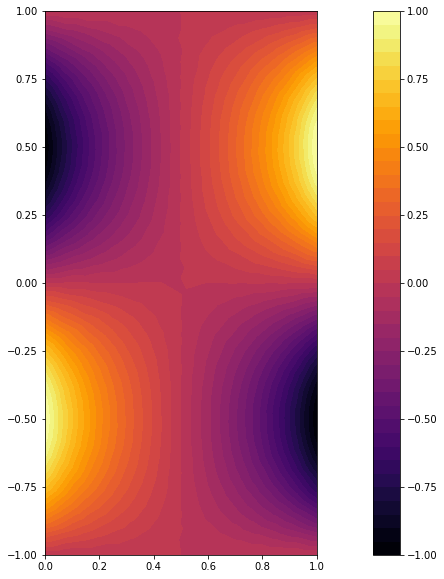

<Figure size 720x360 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

In [ ]:

plt.rcParams['figure.figsize'] = [20, 10]

# Create domain
meshsize = 20
Wall = Rectangle( dolfin.Point(0.0, -1.0), dolfin.Point(1.0, 1.0) )
CircleDuct = Circle( dolfin.Point(1.0, 5.0), .5, 5*meshsize)
SquareDuct = Rectangle(dolfin.Point(.5,10), dolfin.Point(1.5,11))
domain = Wall #- CircleDuct - SquareDuct

# Create mesh from domain and define function space
meshwall = generate_mesh(domain, meshsize)
V = FunctionSpace(meshwall, 'P', 1)

Vdg = VectorFunctionSpace ( meshwall , 'DG', 0)

gD_bottom = Expression('0', degree = 1) 
gD_top = Expression('0', degree = 1) 
gD_left = Expression('-sin(pi*x[1])', degree = 1) 
gD_right = Expression('sin(pi*x[1])', degree = 1) 
#gD_right = Constant(10.0) #Square Duct

tol = 1E-10 #very small value #0.000000000000000001
def bottom(x):
    return abs(x[1] + 1) < tol
def top(x):
    return abs(x[1] - 1) < tol
def left(x):
    return abs(x[0]) < tol
def right(x):
    return abs(x[0] - 1) < tol
    

bc_bottom = DirichletBC (V , gD_bottom, bottom )
bc_top = DirichletBC(V, gD_top, top)
bc_left = DirichletBC(V, gD_left, left)
bc_right = DirichletBC(V, gD_right, right)

bcs = [bc_bottom, bc_top, bc_left, bc_right] #store boundaries

gN = Constant(0.0)

# Define variational problem
u = TrialFunction(V)
v = TestFunction(V)
f = Constant(0.0)

a = dot(grad(u), grad(v))*dx 
L = f * v * dx #- gN * v * ds 
u = Function(V)

solve ( a == L , u , bcs )

# Sample function projected onto function space
#u_test = Expression('2.*x[1]', degree=1)
#Pu_test = project(u_test, V)

# Save solution to file in VTK format for inspection in paraview
vtkfile = File('solutions/Pu_test.pvd')
vtkfile << u

# Fenics plot of mesh
a = plot(u, cmap = 'inferno')
plt.colorbar(a)
#plot(meshwall)
#plt.savefig("Wall.png", dpi = 150)
#plt.figure(figsize=(30, 25), dpi= 200)
plt.figure(figsize=(10,5))
plt.show()
plt.savefig("Wall.png", dpi = 150) 